![LipPike](https://upload.wikimedia.org/wikipedia/commons/3/32/Lip_Pike_Baseball.jpg "Lip Pike had Style")

### Back in the Good Ole Days of Base Ball...

In [1]:
cd ..

/Users/johnphillips/Desktop/DSI-Class-Stuff/BaseBall


In [2]:
%matplotlib inline

In [3]:
%run __init__.py

In [4]:
# Start with reading the data sets from the pickles

teams = pd.read_pickle('data/teams.p') # Full Data
teams_num = pd.read_pickle('data/teams_num.p') # Numeric Features
new_reduced = pd.read_pickle('data/new_reduced.p') # Reduced from PCA
salaries = pd.read_pickle('data/salaries.p') # Team Salaries 1985 - 2016
rockies = pd.read_pickle('data/rockies.p') # 2017 Rockies Team Stats

### Can we predict which team would win the World Series before 1903?

In [5]:
# Start with separating old_teams:
old_teams = teams[(teams['yearID'] < 1903)]
old_teams_num = old_teams.select_dtypes(exclude=['object', 'category'])

# Had to also drop Wins, Losses, and WinP since those are direct indicators.
# And they are not part of a players individual stats.
X_old = old_teams_num.drop(['WSWin', 'LgWin', 'W', 'L', 'WinP'], axis=1) 
y_old = old_teams_num['LgWin']

In [6]:
# Start with separating new_teams
new_teams = teams[(teams['yearID'] > 1903)]
new_teams_num = new_teams.select_dtypes(exclude=['object', 'category'])

# Had to also drop Wins, Losses, and WinP since those are direct indicators.
# And they are not part of a players individual stats.
X_new = new_teams_num.drop(['WSWin', 'LgWin', 'W', 'L', 'WinP'], axis=1) 
y_new = new_teams_num['WSWin']

In [7]:
# Had to also drop Wins, Losses, and WinP since those are direct indicators.
# And they are not part of a players individual stats.
X = teams_num.drop(['WSWin', 'LgWin', 'W', 'L', 'WinP'], axis=1) 

# Make a y2 based upon Winning Leage Series, for possible second model.
y = teams_num['WSWin']

### Build simple pipeline

In [8]:
# Setup the pipeline steps
steps = [('scaler', StandardScaler()),
        ('logreg', LogisticRegression())]
        
# Create the pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Fit the pipeline to the training set
logreg_scaled = pipeline.fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(logreg_scaled.score(X_test, y_test)))

Accuracy with Scaling: 0.965444287729


In [9]:
# Predict on old dataset

# very imbalanced class!
pipeline.predict(X_old)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [10]:
# Compute and print accuracy
accuracy = pipeline.score(X_old, y_old)
print "Accuracy on old_data: ", accuracy

Accuracy on old_data:  0.891566265060241


### Back to the Regression Problem

In [11]:
# Start with separating old_teams:
old_teams = teams[(teams['yearID'] < 1903)]
old_teams_num = old_teams.select_dtypes(exclude=['object', 'category'])

# Had to also drop Wins, Losses, and WinP since those are direct indicators.
# And they are not part of a players individual stats.
X_old = old_teams_num.drop(['WSWin', 'LgWin', 'W', 'L', 'WinP'], axis=1) 
y_old = old_teams_num['WinP']

In [12]:
# Had to also drop Wins, Losses, and WinP since those are direct indicators.
# And they are not part of a players individual stats.
X = teams_num.drop(['WSWin', 'LgWin', 'W', 'L', 'WinP'], axis=1) 

# Make a y2 based upon Winning Leage Series, for possible second model.
y = teams_num['WinP']

In [13]:
# Setup the pipeline steps
steps = [('scaler', StandardScaler()),
        ('linreg', LinearRegression())]
        
# Create the pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Fit the pipeline to the training set
linreg_scaled = pipeline.fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(linreg_scaled.score(X_test, y_test)))

Accuracy with Scaling: 0.913143105913


In [14]:
# Predict on old dataset

pipeline.predict(X_old)

array([ 0.62652865,  0.5246192 ,  0.37655006,  0.23652791,  0.48246895,
        0.62372922,  0.38830169,  0.49968564,  0.45905194,  0.61112298,
        0.08129903,  0.21321932,  0.76793312,  0.3961514 ,  0.34231332,
        0.60524633,  0.67381237,  0.57399917,  0.22212194,  0.06336518,
        0.65771467, -0.2003594 ,  0.33564572,  0.75253581,  0.18342601,
        0.5157656 ,  0.5751741 ,  0.57487748,  0.27046334,  0.21008505,
        0.30259358,  0.75323736,  0.44616306,  0.40033103,  0.55396889,
        0.56915547,  0.52244431,  0.08375868,  0.88707328,  0.45914521,
        0.64204097,  0.1892619 ,  0.20644359,  0.3776671 ,  0.70354677,
        0.53007535,  0.2502094 ,  0.189175  ,  0.48686083,  0.04434321,
        0.52186366,  0.85669314,  0.18664312,  0.63205618,  0.44573982,
        0.30397316,  0.3857981 ,  0.61777548,  0.66281603,  0.51774969,
        0.31858938,  0.53332911,  0.5648224 ,  0.44792264,  0.53190309,
        0.57095331,  0.5607756 ,  0.44365143,  0.36035943,  0.52

In [15]:
# Compute and print accuracy
accuracy = pipeline.score(X_old, y_old)
print "Accuracy on old_data: ", accuracy

Accuracy on old_data:  0.9124961122568418


### Unsupervised Learning
Can we cluster?

In [16]:
# Start with separating old_teams:
old_teams = teams[(teams['yearID'] < 1903)]
old_teams_num = old_teams.select_dtypes(exclude=['object', 'category'])

# Had to also drop Wins, Losses, and WinP since those are direct indicators.
# And they are not part of a players individual stats.
X_old = old_teams_num.drop(['WSWin', 'LgWin', 'W', 'L', 'WinP'], axis=1) 
y_old = old_teams_num['LgWin']

# Had to also drop Wins, Losses, and WinP since those are direct indicators.
# And they are not part of a players individual stats.
X = teams_num.drop(['WSWin', 'LgWin', 'W', 'L', 'WinP'], axis=1) 

# Make a y2 based upon Winning Leage Series, for possible second model.
y = teams_num['WSWin']

In [17]:
# Create a KMeans instance with 2 clusters: model
model = KMeans(n_clusters=2)

# Fit model to points
model.fit(X)

# Predict for X_old
labels = model.predict(X_old)

# Print cluster labels of new_points
print(labels)

# Not very good cluster

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]


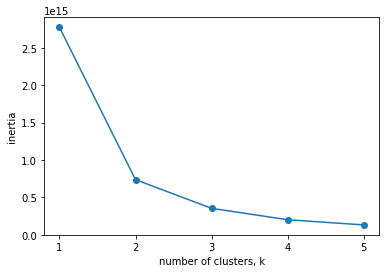

In [18]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(X)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

### Make better Cluster

In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

# Create scaler: scaler
scaler = StandardScaler()
normalizer = Normalizer()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=2)

# Create pipeline: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit the pipeline to samples
pipeline.fit(X)

# Calculate the cluster labels: labels
labels = pipeline.predict(X)
ws_wins = teams_num['WSWin']

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels': labels, 'wins': ws_wins})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['wins'])

# Display ct
print(ct)

wins       0    1
labels           
0       2443  112
1        275    5


### t-SNE to get insights

In [25]:
# Import TSNE
from sklearn.manifold import TSNE

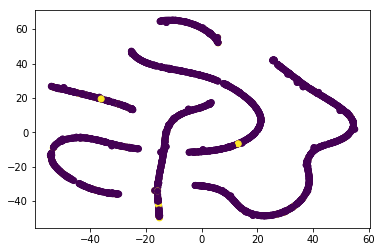

In [26]:
# Create a TSNE instance: model
model = TSNE(learning_rate=100)

# Apply fit_transform to X_new: tsne_features
tsne_features = model.fit_transform(X_new)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Array for coloring of dots
y_new = new_teams_num['WSWin']

# Scatter plot, coloring by WSWin
plt.scatter(xs, ys, c=y_new)
plt.show()

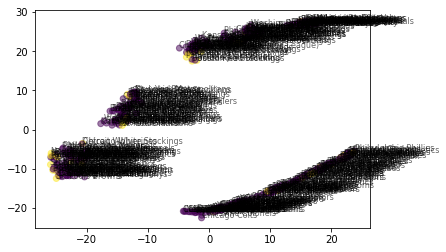

In [27]:
# Different approach for Old Teams

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(X_old)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Array for color of dots
y_old = old_teams_num['LgWin']

# Scatter plot
plt.scatter(xs, ys, alpha=0.5, c=y_old)

# list of Team names
teams = old_teams['name']

# Annotate the points
for x, y, team in zip(xs, ys, teams):
    plt.annotate(team, (x, y), fontsize=8, alpha=0.6)
plt.show()